In [1]:
import pandas as pd

In [19]:
# from Baseball Savant, get arm strength using TY data
# min throws = 50
def read_arm_strength(year):
    df = pd.read_csv(f'Arm Strength {year}.csv', index_col=False)[['fielder_name', 'player_id', 'arm_overall']].set_index('player_id')
    
    # join with player ids
    player_map = pd.read_csv('../../PLAYERIDMAP 2022.csv')[['MLBID', 'PLAYERNAME']].set_index('MLBID')
    merge = df[['arm_overall']].merge(player_map, how='left', left_index=True, right_index=True)[['PLAYERNAME', 'arm_overall']]
    
    return merge

as_data = read_arm_strength(2022)
as_data.head()

,PLAYERNAME,arm_overall
429664,Robinson Cano,76.3
444482,David Peralta,79.9
444876,Alcides Escobar,82.5
446334,Evan Longoria,74.9
453568,Charlie Blackmon,91.0


3.336363636363636
61.4
98.1


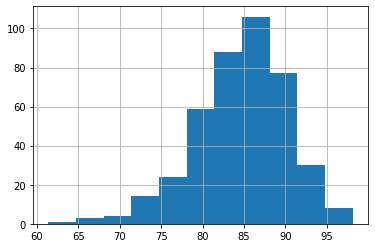

In [32]:
print((as_data['arm_overall'].max() - as_data['arm_overall'].min()) / 11)
print(as_data['arm_overall'].min())
print(as_data['arm_overall'].max())
hist = as_data['arm_overall'].hist(bins=11)

In [62]:
def get_arm(arm):
    i = 0
    while i < 10:
        floor = 61.4 + (i * 3.5)
        if arm > floor:
            i += 1
        else:
            break
    return 4 + i
get_arm(87)

12

In [63]:
def assign_arm(year):
    arm_data = read_arm_strength(2022)
    arm_data['Arm Strength'] = arm_data.apply(lambda x: get_arm(x['arm_overall']), axis=1)
    return arm_data[['PLAYERNAME', 'Arm Strength']].dropna()

arm_df = assign_arm(2022)
arm_df.head()

,PLAYERNAME,Arm Strength
429664,Robinson Cano,9
444482,David Peralta,10
444876,Alcides Escobar,11
446334,Evan Longoria,8
453568,Charlie Blackmon,13


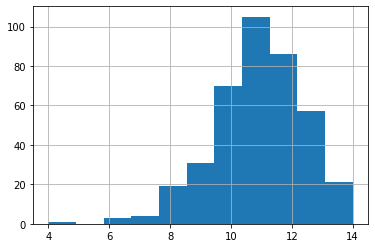

In [64]:
hist2 = arm_df['Arm Strength'].hist(bins=11)

In [65]:
arm_df.to_csv('2022_Fielder_Arm.csv')